In [1]:
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azure.storage.blob import BlobServiceClient

In [2]:
from src.paychex_ml.utils import load_credentials
from src.paychex_ml.ts_diagnosis import stationarity_test
from src.paychex_ml.ts_diagnosis import autocorrelation_test

In [3]:
credentials = load_credentials("blob_storage",
                               file="C:/Users/bruno.gonzalez/DataspellProjects/Paychex_revenue_forecast/credentials.yml")

In [4]:
# Start client
container_name = "clean-data"
blob_service_client = BlobServiceClient.from_connection_string(credentials['conn_string'])
container_client = blob_service_client.get_container_client(container_name)

In [5]:
# Download file
file = 'paychex_revenue.parquet'
stream_downloader = container_client.download_blob(file)
stream = BytesIO()
stream_downloader.readinto(stream)

34156

In [6]:
df = pd.read_parquet(stream, engine='pyarrow')
df['Calendar Date'] = pd.PeriodIndex(df['Calendar Date'], freq='M')
df = df.set_index('Calendar Date')
df_month = df[df['Scenario']=='Actual']
#df_month = df_month.select_dtypes(include=np.number)

In [7]:
df_month

,Scenario,Version,Fiscal Period,11 Payroll Blended Products,12 W2 Revenue,13 Delivery Revenue,14 ASO Allocation,15 Other Processing Revenue,16 SurePayroll,17 Total International,20 Total 401k,31 HR Solutions (excl PEO),32 ASO Revenue - Oasis,40 Total Online Services,50 Other Managment Solutions,60 Total PEO,70 Total Insurance Services,80 Interest on Funds Held for Clients
Calendar Date,,,,,,,,,,,,,,,,,,
2014-06,Actual,Final Revised,FY1501,99633512.0,7031234.09,7393351.97,7255027.55,4765775.19,3246967.02,808003.64,14883414.0,21143605.0,0.00,8581821.0,6350954.0,12948698.0,10084069.0,3308153.0
2014-07,Actual,Final Revised,FY1502,121619696.0,7325377.82,13513741.18,9070820.80,6502729.54,3362473.02,855305.18,15071771.0,25838048.0,0.00,9700908.0,7011081.0,14670280.0,10353254.0,3466374.0
2014-08,Actual,Final Revised,FY1503,99472483.0,7443620.46,7286966.62,7489159.50,4215268.17,3286111.93,801651.38,14783933.0,21762760.0,0.00,8726405.0,6765242.0,14606683.0,10968738.0,3434418.0
2014-09,Actual,Final Revised,FY1504,94198230.0,7414842.11,7081861.96,7011292.24,4726806.24,3345328.53,834334.16,17075301.0,20288451.0,0.00,8945846.0,6369484.0,14456324.0,11250149.0,3419918.0
2014-10,Actual,Final Revised,FY1505,124353873.0,7818212.35,13741077.44,9372927.59,6514037.07,3402641.78,869205.85,18252956.0,26755143.0,0.00,10156903.0,7345929.0,14544807.0,11859545.0,3472038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01,Actual,Final Revised,FY2108,94834624.0,80988881.77,22548298.89,13265382.71,8645189.69,7062932.96,4373773.19,23143326.0,38395293.0,274401.85,15194875.0,21106947.0,71734133.0,14156734.0,5034426.0
2021-02,Actual,Final Revised,FY2109,96978102.0,28599.77,6430193.76,13666646.86,6625228.73,6757198.28,4321140.10,23583891.0,39462133.0,292114.39,14293257.0,27578999.0,65858228.0,14634736.0,4984652.0
2021-03,Actual,Final Revised,FY2110,110554131.0,-43477.46,7657980.44,16053700.85,6834861.06,7127288.42,4330584.30,24032102.0,45766968.0,254020.04,16081475.0,23814271.0,70139851.0,17799883.0,5028117.0


# Stationary Test

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


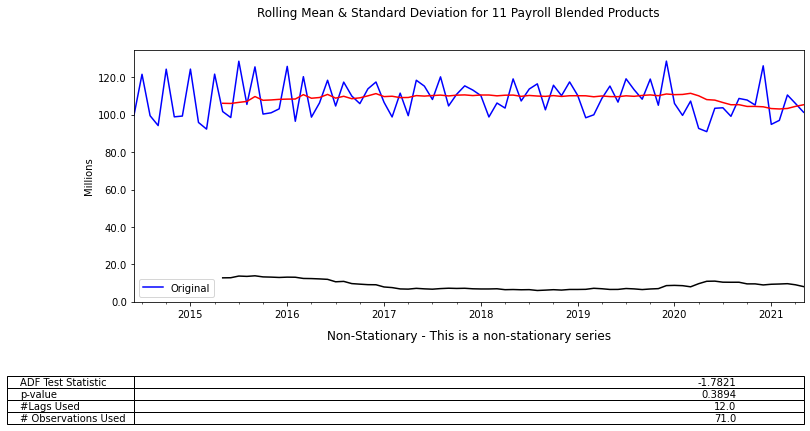

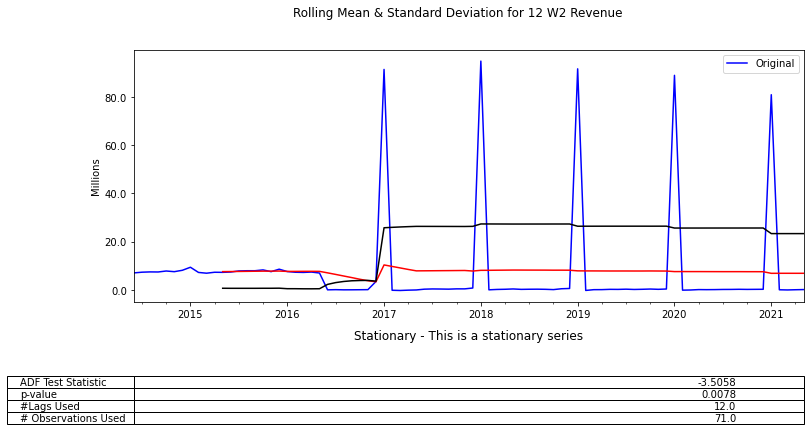

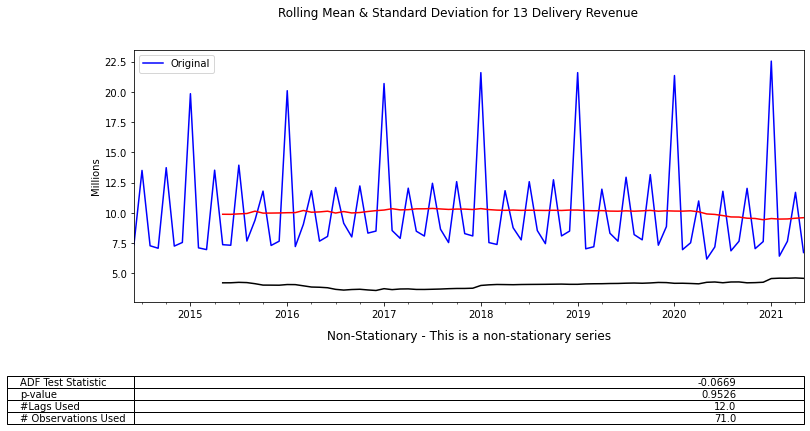

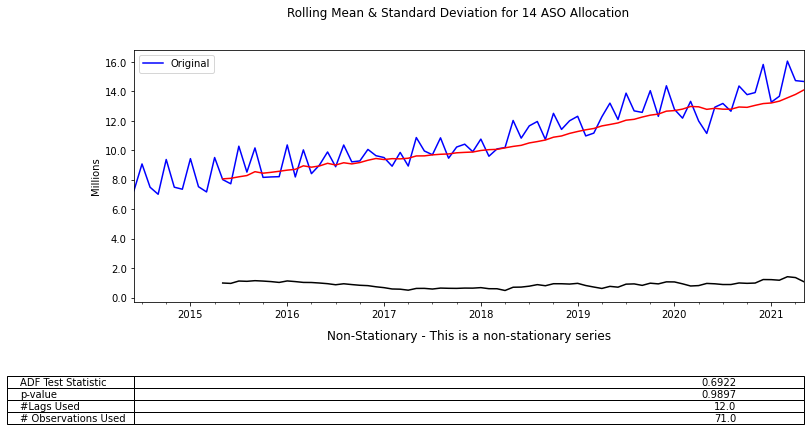

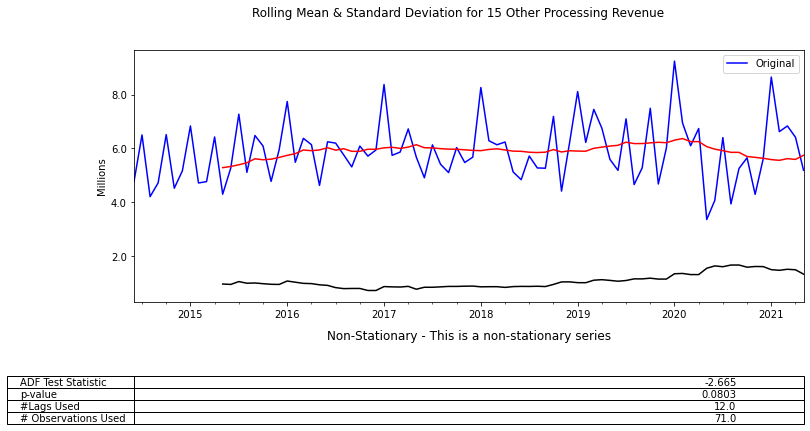

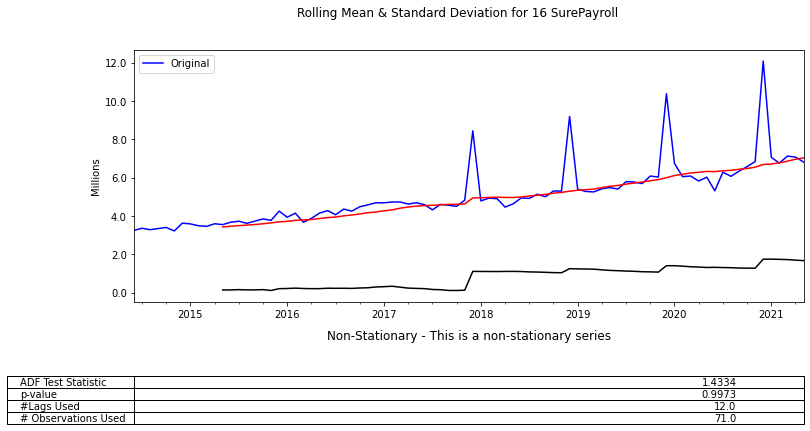

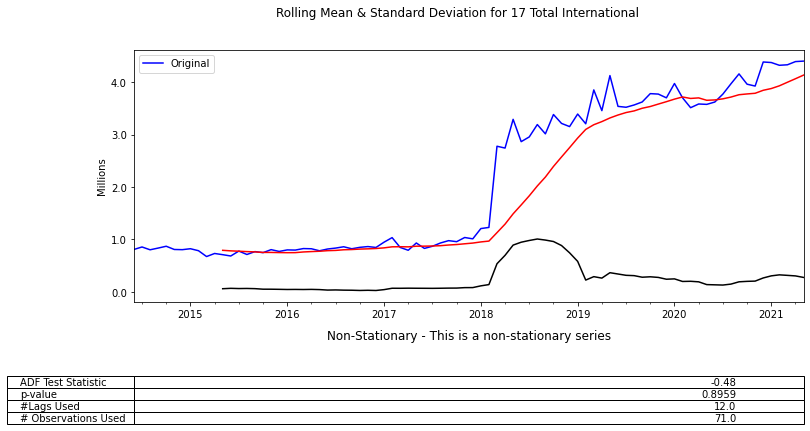

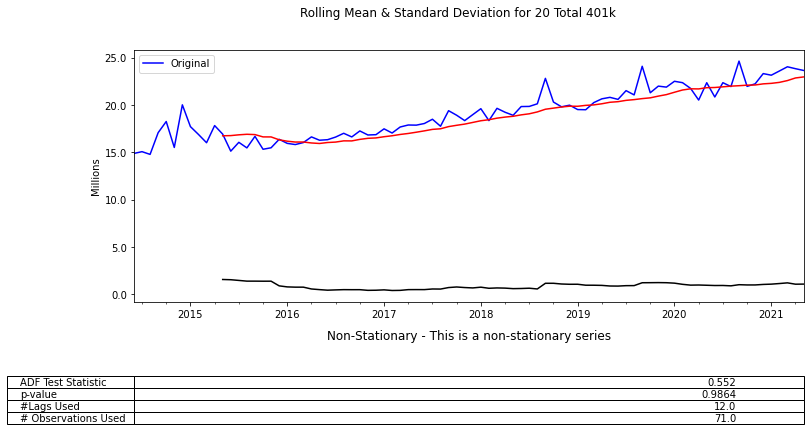

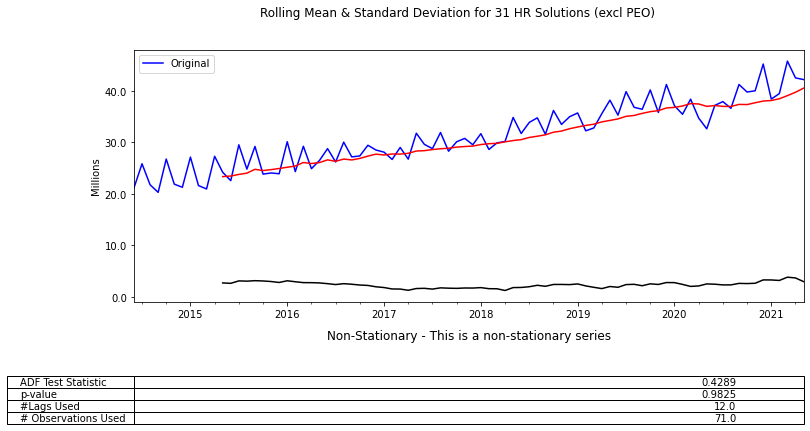

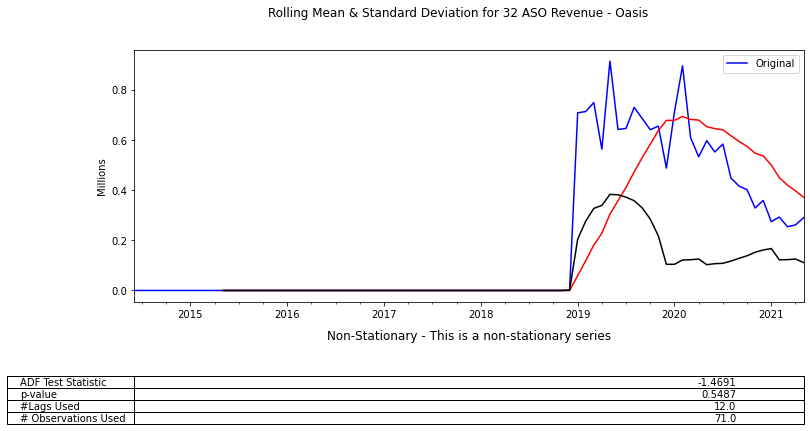

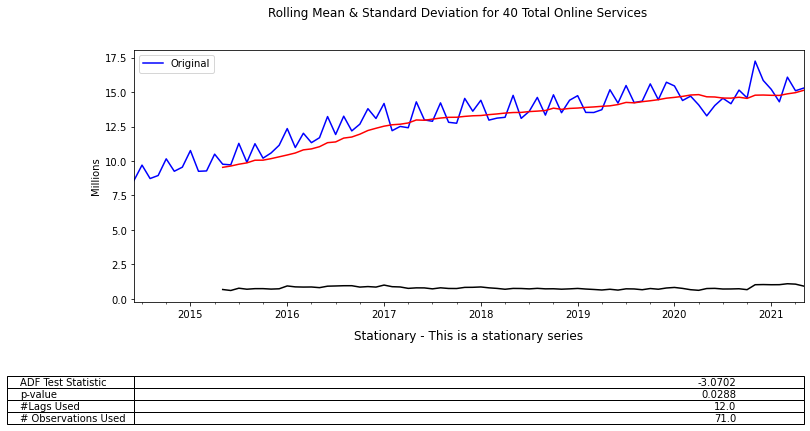

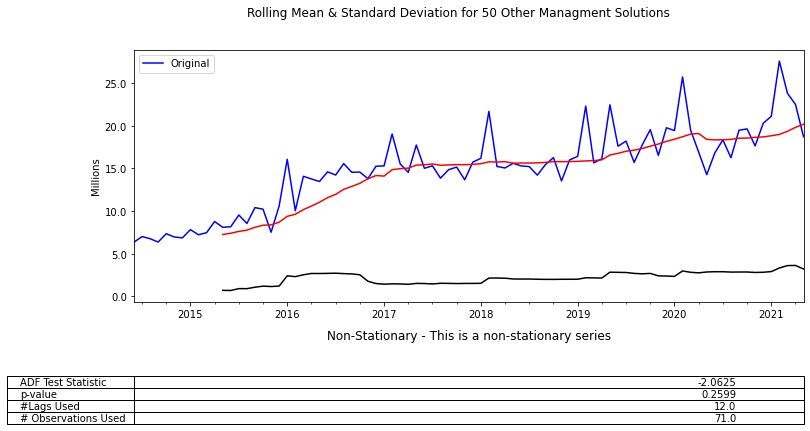

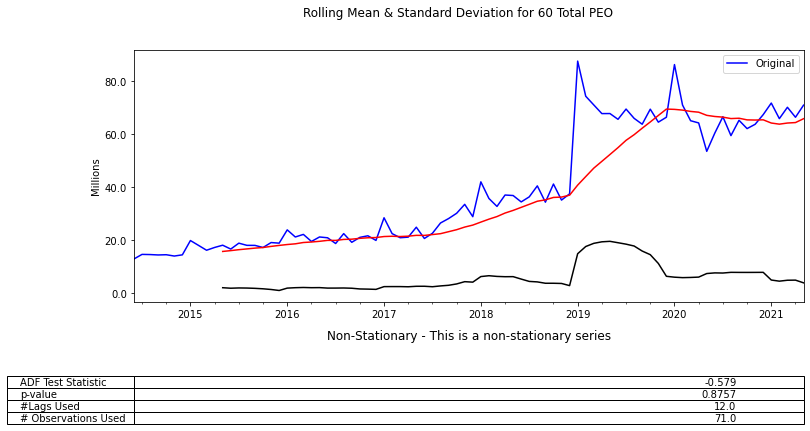

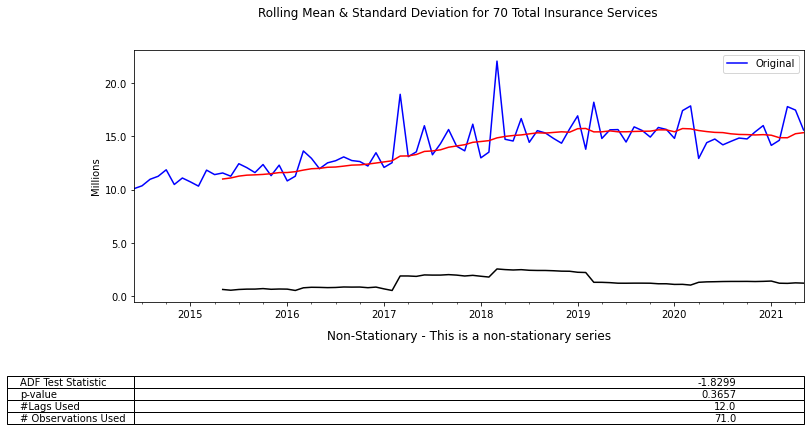

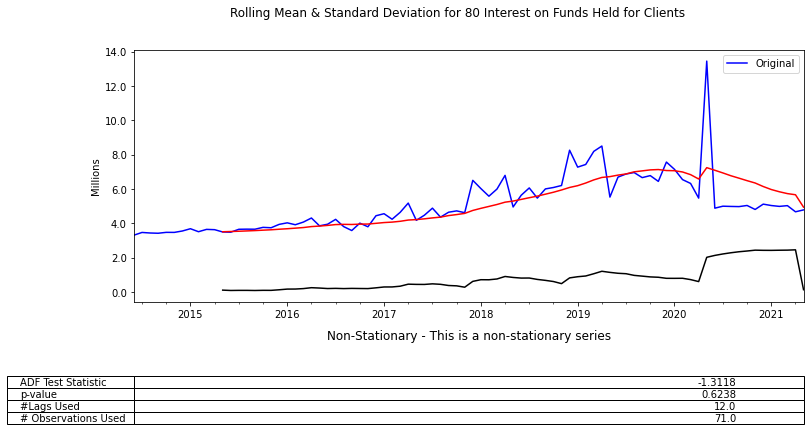

In [8]:
for c in df_month.select_dtypes(include=np.number).columns:
    fig = stationarity_test(df_month[c], maxlag=12, autolag=None)

# Autocorrelation test

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


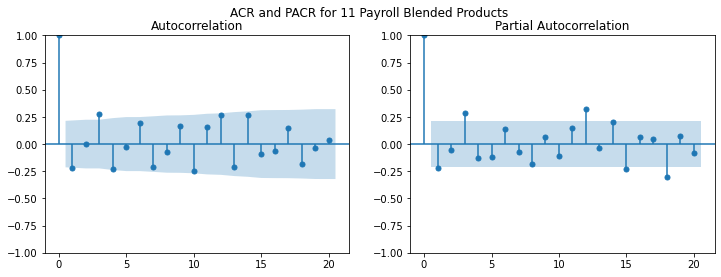

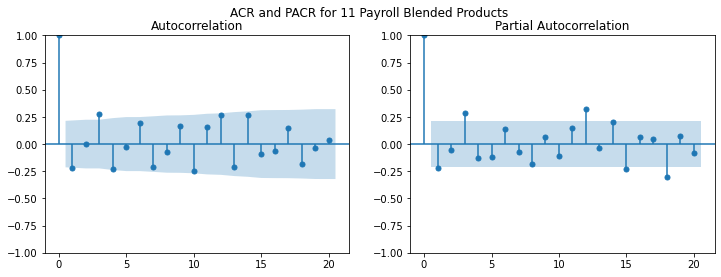

In [9]:
autocorrelation_test(df_month['11 Payroll Blended Products'])

C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\azml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warning

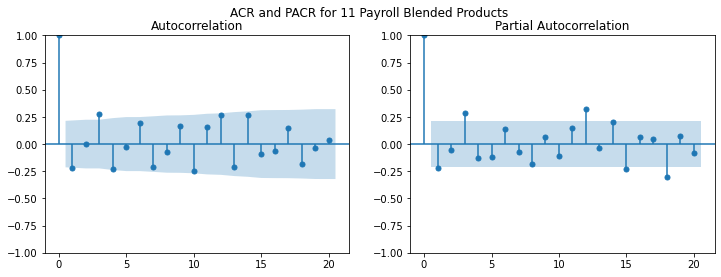

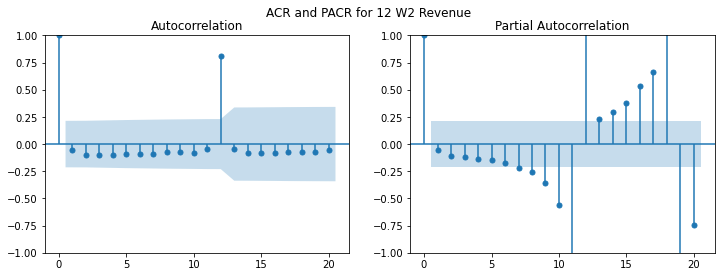

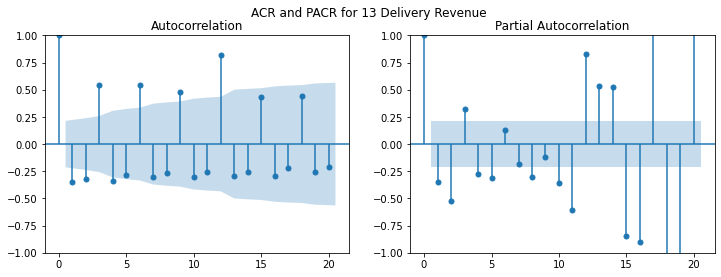

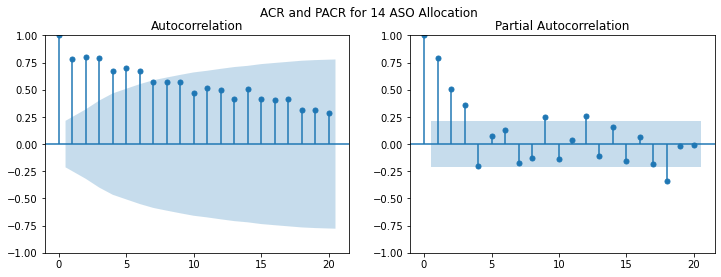

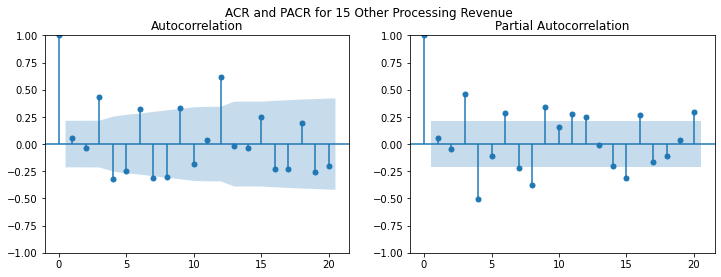

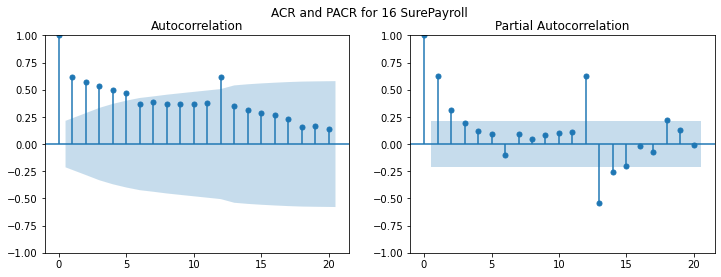

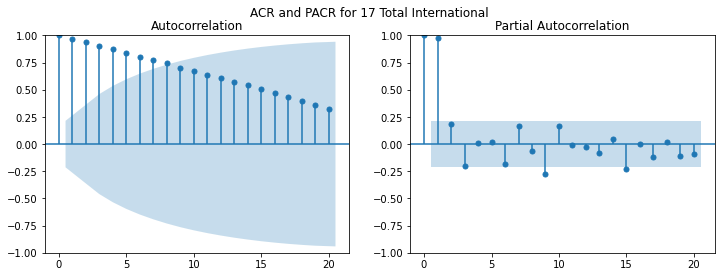

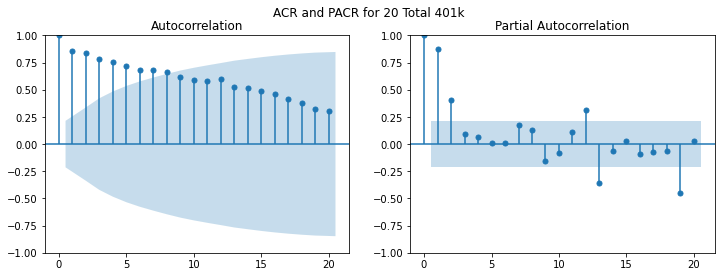

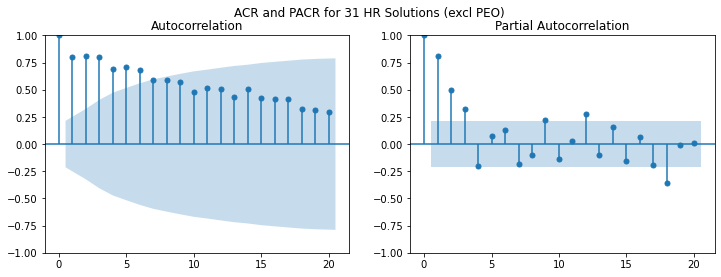

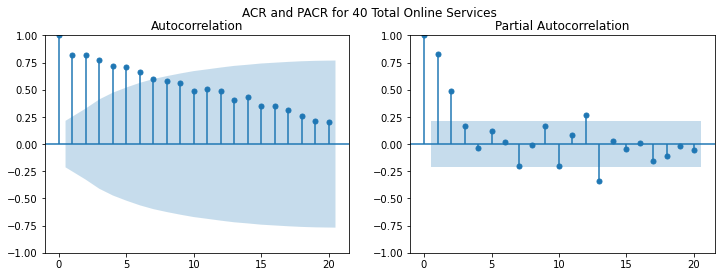

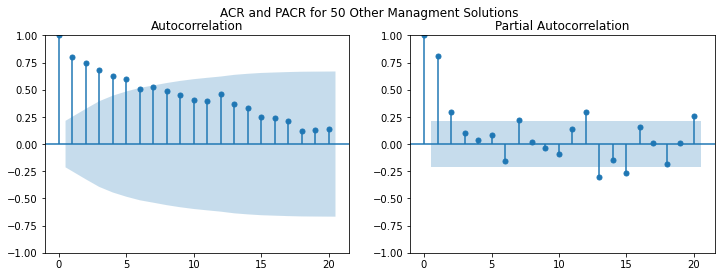

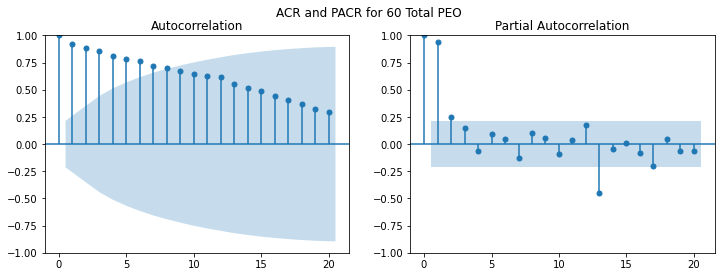

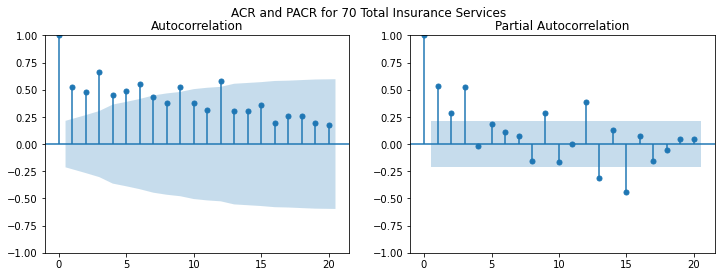

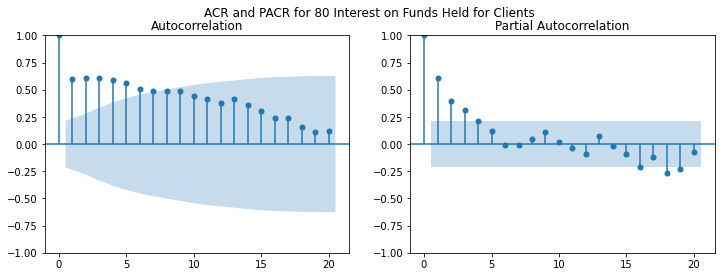

In [8]:
for c in df_month.select_dtypes(include=np.number).columns:
    fig = autocorrelation_test(df_month[c])